Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB
None

First 5 Rows:
    ad_id  xyz_campaign_id  fb_campaign_id    age gender  interest  \
0  708746              916          103916  30-34      M        15   

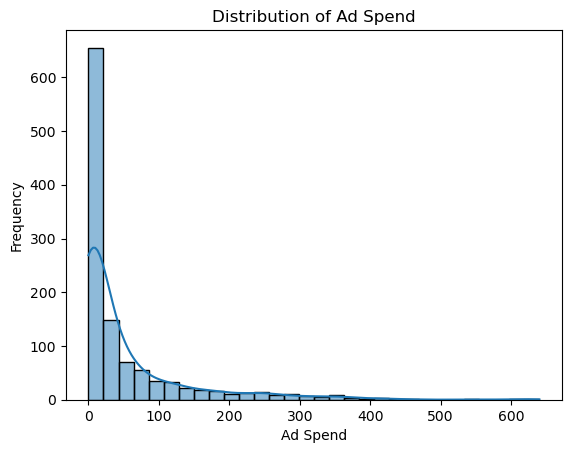

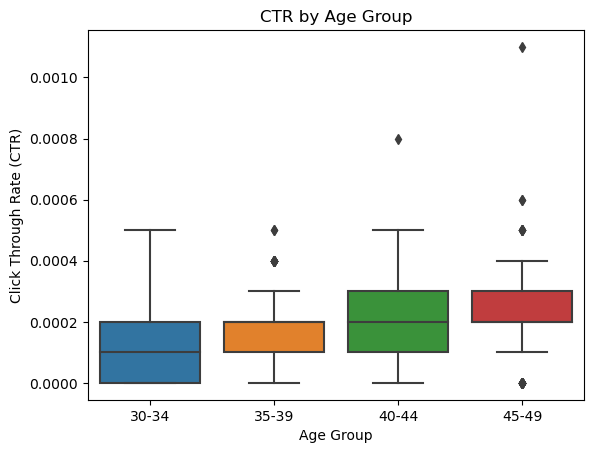

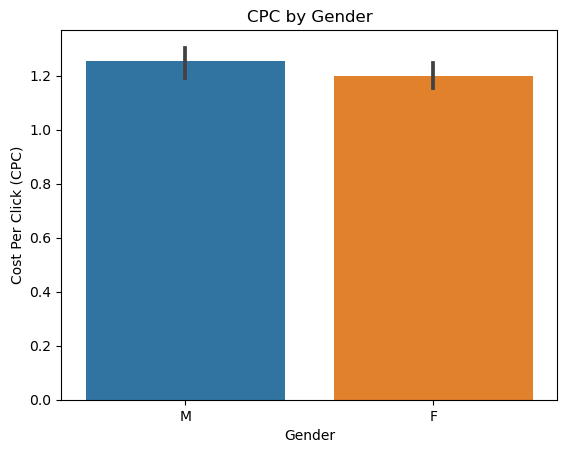


Cleaned dataset exported to: cleaned_project_2.csv


In [2]:
# E-commerce Return Rate Reduction Analysis
# Step 1: Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load Dataset
file_path = 'project_2.csv'  # Replace with your dataset filename
data = pd.read_csv('C:\\Users\\harsh\\OneDrive\\Desktop\\CSV\\project 2.csv')

# Display basic information about the dataset
print("Dataset Information:")
print(data.info())
print("\nFirst 5 Rows:")
print(data.head())

# Step 3: Data Cleaning
# Check for missing values
print("\nMissing Values Summary:")
print(data.isnull().sum())

# There are no missing values in this dataset

# Check for duplicates
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Remove duplicates if any
if duplicates > 0:
    data = data.drop_duplicates()
    print("\nDuplicate rows removed.")

# Step 4: Feature Engineering
# Add a column for Click Through Rate (CTR) = Clicks / Impressions
data['CTR'] = (data['Clicks'] / data['Impressions']).round(4)

# Add a column for Cost Per Click (CPC) = Spent / Clicks
data['CPC'] = (data['Spent'] / data['Clicks']).replace([float('inf'), float('nan')], 0).round(2)

# Step 5: Explore Data
# Distribution of Spent
sns.histplot(data['Spent'], kde=True, bins=30)
plt.title('Distribution of Ad Spend')
plt.xlabel('Ad Spend')
plt.ylabel('Frequency')
plt.show()

# CTR by Age Group
sns.boxplot(x='age', y='CTR', data=data)
plt.title('CTR by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Click Through Rate (CTR)')
plt.show()

# CPC by Gender
sns.barplot(x='gender', y='CPC', data=data)
plt.title('CPC by Gender')
plt.xlabel('Gender')
plt.ylabel('Cost Per Click (CPC)')
plt.show()

# Step 6: Export Cleaned Dataset
cleaned_file_path = 'cleaned_project_2.csv'
data.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned dataset exported to: {cleaned_file_path}")

# End of Preprocessing
